# PLM PROJECT - ALE Environment - Skiing

<div class="alert alert-block alert-info">

Martina Carretta || NIU: 1673930

Mariona Pla || NIU: 1616474
</div>


Before training the agent to play the Skiing game, it is essential to conduct an initial analysis to establish a baseline. This involves observing the performance of an untrained agent to understand how it interacts with the environment and the rewards it receives.

Recording gameplay as GIFs is valuable, as it allows for visual inspection of how the random agent moves. This provides a useful reference point for later comparing the agent's behavior after training, helping to highlight the improvements in its movements over time.

In [1]:
import gymnasium as gym
import numpy as np
import torch
from PIL import Image
import ale_py
import matplotlib.pyplot as plt


### Environment analysis

In [2]:
env = gym.make("ALE/Skiing-v5", render_mode="rgb_array")  # render mode to allow GIF recording

print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))


A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]


Action space is Discrete(3) 
Observation space is Box(0, 255, (210, 160, 3), uint8) 


**Actions**:
- 0: NOOP
- 1: RIGHT
- 2: LEFT

**Observation space**:
- Array with shape (210, 160, 3) where each element is an integer between 0 and 255

________________________

### Episode reward analysis

After several episodes, it is observed that the episode rewards in Skiing generally range from -20,000 to -13,000.

Saved GIF for Episode 10 as untrained_agent_episode_10.gif
Saved GIF for Episode 20 as untrained_agent_episode_20.gif
Saved GIF for Episode 30 as untrained_agent_episode_30.gif
Saved GIF for Episode 40 as untrained_agent_episode_40.gif
Saved GIF for Episode 50 as untrained_agent_episode_50.gif
Saved GIF for Episode 60 as untrained_agent_episode_60.gif
Saved GIF for Episode 70 as untrained_agent_episode_70.gif
Saved GIF for Episode 80 as untrained_agent_episode_80.gif
Saved GIF for Episode 90 as untrained_agent_episode_90.gif
Saved GIF for Episode 100 as untrained_agent_episode_100.gif


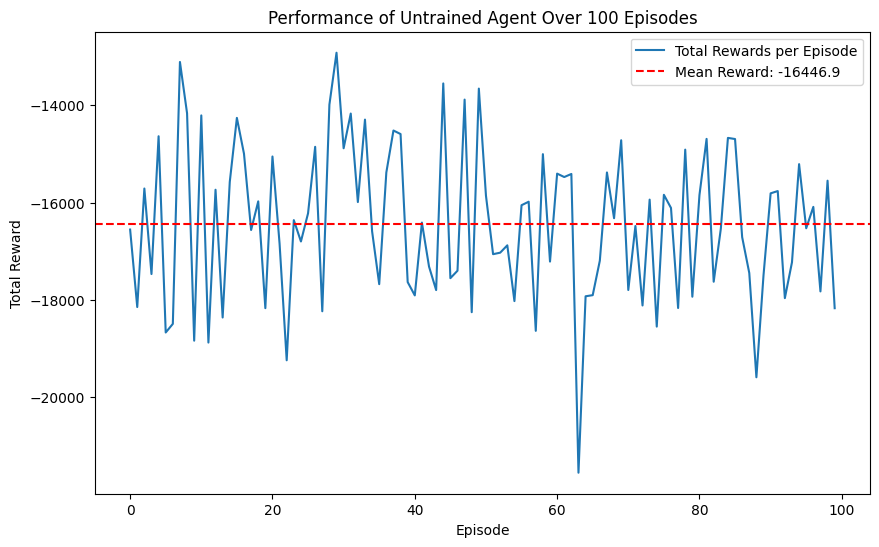

In [4]:
def watch_untrained_agent(env):
    episode_rewards = []
    for episode in range(100):
        # Reset the environment
        state, _ = env.reset()
        rewards = []
        images = []

        # Maximum time steps for the episode
        for t in range(2000):
            # Randomly select an action (untrained agent)
            action = env.action_space.sample()

            # Render the environment and save the frame
            img = env.render()
            images.append(Image.fromarray(img))

            # Execute action and get reward and new state
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            rewards.append(reward)

            if done:
                # Add the total reward of this episode to the list
                episode_rewards.append(sum(rewards))

                # Save a GIF if the episode is a multiple of 10
                if (episode + 1) % 10 == 0:
                    gif_filename = f"untrained_agent_episode_{episode + 1}.gif"
                    images[0].save(
                        gif_filename,
                        save_all=True,
                        append_images=images[1:],
                        duration=60,
                        loop=0,
                    )
                    print(f"Saved GIF for Episode {episode + 1} as {gif_filename}")
                break

    return episode_rewards

# Watch the agent and collect episode rewards
episode_rewards = watch_untrained_agent(env)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Total Rewards per Episode")
plt.axhline(np.mean(episode_rewards), color='r', linestyle='--', label=f"Mean Reward: {np.mean(episode_rewards)}")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Performance of Untrained Agent Over 100 Episodes")
plt.legend()
plt.show()


## Action rewards analsysis

The game documentation states that seconds are the only rewards, negative rewards and penalties are assigned as additional seconds. 

After running multiple episodes in the Skiing ALE environment, it is observed that the rewards consistently consist of small negative values, -6 or -7, throughout the course of the game. 

However, at the end of the game, a large negative reward is given. These reward patterns are indicative of the environment's design, where players are penalized for mistakes or poor performance during the game, and the larger negative reward at the end serves to strongly discourage undesirable actions, such as falling or missing checkpoints.

In [6]:
def play_episode(env):
    # Reset the environment for the episode
    state, _ = env.reset()
    rewards = []
    images = []

    # Maximum time steps for the episode
    for t in range(2000):
        # Randomly select an action (untrained agent)
        action = env.action_space.sample()

        # Execute action and get reward and new state
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        rewards.append(reward)

        if done:
            break
    
    return rewards

# Watch the agent and collect rewards for the episode
rewards = play_episode(env)
print(rewards)
print(f'episode length: {len(rewards)}')

# Calculate and display statistics
min_reward = np.min(rewards)
mean_reward = np.mean(rewards)
max_reward = np.max(rewards)
unique_rewards = sorted(set(rewards))

# Display the statistics
print("\nStatistics:")
print(f"Minimum Reward: {min_reward}")
print(f"Mean Reward: {mean_reward}")
print(f"Maximum Reward: {max_reward}")

# Display sorted unique rewards
print(f"Unique Rewards: {unique_rewards}")

# Close the environment
env.close()

[-7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.0, -6.0, -7.0, -7.